
#1,set.sys

#2,读取数据
               open     high    close      low       volume        amount    xopen    open2
date                                                                                       
2017-04-26 3132.918 3152.953 3140.847 3131.418  16987810700  197112873017 3131.350 3255.736
2017-04-27 3131.350 3155.003 3152.187 3097.333  21179307300  235748319355 3144.022 3267.485
2017-04-28 3144.022 3154.727 3154.658 3136.578  16288989900  183195769806 3147.228 3270.045
2017-05-02 3147.228 3154.781 3143.712 3136.539  15422296200  176389916688 3138.307 3258.704
2017-05-03 3138.307 3148.286 3135.346 3123.751  16376392400  190236600690      nan 3250.036

#3,绘制对比曲线图
              xopen    open2
date                        
2017-04-25 3132.918 3249.229
2017-04-26 3131.350 3255.736
2017-04-27 3144.022 3267.485
2017-04-28 3147.228 3270.045
2017-05-02 3138.307 3258.704

#4,计算预测结果
             y_true   y_pred  y_diff  y_true2  y_kdif
date                                                 
2

'\n\nn_df9,3671,n_dfk,3655\nacc-kok: 99.56%, MAE:42.65, MSE:2463.18, RMSE:49.63\n             y_test   y_pred    ysub  ysub2  y_test_div  ysubk\ndate                                                          \n2017-04-25 3132.918 3185.180 -52.262 52.262    3132.918  1.668\n2017-04-26 3131.350 3191.560 -60.210 60.210    3131.350  1.923\n2017-04-27 3144.022 3203.079 -59.057 59.057    3144.022  1.878\n2017-04-28 3147.228 3205.589 -58.361 58.361    3147.228  1.854\n2017-05-02 3138.307 3194.470 -56.163 56.163    3138.307  1.790\na1, 99.564\n\nn_df9,3671,n_dfk,3659\nacc-kok: 99.67%, MAE:48.65, MSE:3069.45, RMSE:55.40\n             y_test   y_pred   ysub  ysub2  y_test_div  ysubk\ndate                                                         \n2017-04-25 3132.918 3070.900 62.018 62.018    3132.918  1.980\n2017-04-26 3131.350 3077.054 54.296 54.296    3131.350  1.734\n2017-04-27 3144.022 3088.166 55.856 55.856    3144.022  1.777\n2017-04-28 3147.228 3090.588 56.640 56.640    3147.228  1.800\n201

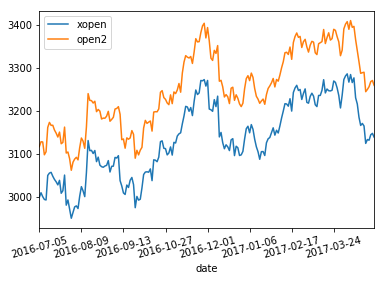

In [2]:
# -*- coding: utf-8 -*-
'''
TopQuant-简称TQ极宽智能量化回溯分析系统，培训课件-配套教学python课件程序

Top极宽量化(原zw量化)，Python量化第一品牌 
by Top极宽·量化开源团队 2017.10.1 首发

网站： www.TopQuant.vip      www.ziwang.com
QQ群: Top极宽量化1群，124134140
      Top极宽量化2群，650924099
      Top极宽量化3群，450853713
  
'''

import os,ffn
import numpy as np
import pandas as pd
import tushare as ts
import plotly as py
import plotly.figure_factory  as pyff

import tflearn
import tensorflow as tf

#  TopQuant
import zsys 
import zpd_talib as zta
import ztools as zt
import ztools_tq as ztq
import ztools_draw as zdr
import ztools_data as zdat

%matplotlib inline
#----------

#1
print('\n#1,set.sys')
pd.set_option('display.width', 450)    
pd.set_option('display.float_format', zt.xfloat3)    

#2
print('\n#2,读取数据')
fss='data/df_acc.csv'
df=pd.read_csv(fss,index_col=0)
df=df.sort_index()
print(df.tail())
df=df.dropna()

#3
print('\n#3,绘制对比曲线图')
df2=pd.DataFrame()
df2['xopen']=df['xopen']
df2['open2']=df['open2']
print(df2.tail())
df3=df2.tail(200)
df3.plot(rot=15)



绘制对比曲线图，预测数据和实盘数据在趋势上大体同步，精度有差异。

In [4]:
#4
print('\n#4,计算预测结果')
df5=pd.DataFrame()
df5['y_test']=df2['xopen']
df5['y_pred']=df2['open2']

a1,df5x=ztq.ai_acc_xed2x(df5['y_test'],df5['y_pred'],ky0=5)
print(df5x.tail())
print('\na1,',a1)

a1,df5x,a20=ztq.ai_acc_xed2ext(df5['y_test'],df5['y_pred'],ky0=5)
print('\na20,',a20)

'''

n_df9,3671,n_dfk,3655
acc-kok: 99.56%, MAE:42.65, MSE:2463.18, RMSE:49.63
             y_test   y_pred    ysub  ysub2  y_test_div  ysubk
date                                                          
2017-04-25 3132.918 3185.180 -52.262 52.262    3132.918  1.668
2017-04-26 3131.350 3191.560 -60.210 60.210    3131.350  1.923
2017-04-27 3144.022 3203.079 -59.057 59.057    3144.022  1.878
2017-04-28 3147.228 3205.589 -58.361 58.361    3147.228  1.854
2017-05-02 3138.307 3194.470 -56.163 56.163    3138.307  1.790
a1, 99.564

n_df9,3671,n_dfk,3659
acc-kok: 99.67%, MAE:48.65, MSE:3069.45, RMSE:55.40
             y_test   y_pred   ysub  ysub2  y_test_div  ysubk
date                                                         
2017-04-25 3132.918 3070.900 62.018 62.018    3132.918  1.980
2017-04-26 3131.350 3077.054 54.296 54.296    3131.350  1.734
2017-04-27 3144.022 3088.166 55.856 55.856    3144.022  1.777
2017-04-28 3147.228 3090.588 56.640 56.640    3147.228  1.800
2017-05-02 3138.307 3079.861 58.446 58.446    3138.307  1.862
a1, 99.673
'''



#4,计算预测结果
             y_true   y_pred  y_diff  y_true2  y_kdif
date                                                 
2017-04-25 3132.918 3249.229 116.311 3132.918   3.713
2017-04-26 3131.350 3255.736 124.386 3131.350   3.972
2017-04-27 3144.022 3267.485 123.463 3144.022   3.927
2017-04-28 3147.228 3270.045 122.817 3147.228   3.902
2017-05-02 3138.307 3258.704 120.397 3138.307   3.836

a1, 96.622

a20, [92.19192295398047, 10153.796016279277, 100.76604594941332, 0.9888823571740532]


'\n\nn_df9,3671,n_dfk,3655\nacc-kok: 99.56%, MAE:42.65, MSE:2463.18, RMSE:49.63\n             y_test   y_pred    ysub  ysub2  y_test_div  ysubk\ndate                                                          \n2017-04-25 3132.918 3185.180 -52.262 52.262    3132.918  1.668\n2017-04-26 3131.350 3191.560 -60.210 60.210    3131.350  1.923\n2017-04-27 3144.022 3203.079 -59.057 59.057    3144.022  1.878\n2017-04-28 3147.228 3205.589 -58.361 58.361    3147.228  1.854\n2017-05-02 3138.307 3194.470 -56.163 56.163    3138.307  1.790\na1, 99.564\n\nn_df9,3671,n_dfk,3659\nacc-kok: 99.67%, MAE:48.65, MSE:3069.45, RMSE:55.40\n             y_test   y_pred   ysub  ysub2  y_test_div  ysubk\ndate                                                         \n2017-04-25 3132.918 3070.900 62.018 62.018    3132.918  1.980\n2017-04-26 3131.350 3077.054 54.296 54.296    3131.350  1.734\n2017-04-27 3144.022 3088.166 55.856 55.856    3144.022  1.777\n2017-04-28 3147.228 3090.588 56.640 56.640    3147.228  1.800\n201

两个评估函数
- ai_acc_xed2x
    a1 输出精度,误差在ky0=5%
- a20，[平均绝对误差，均方差（越接近0越好），均方差(越接近0越好)，拟合优度]
    
